# Data Analysis Assignment 2: Call Center Cleanup Solutions

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

north = pd.read_csv("NorthCallCenter.csv")
south = pd.read_csv("SouthCallCenter.csv")

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

#### EDA Question 1:  How many reps are in each branch?  

In [ ]:
# Option using value_counts() 
# 9 in NORTH
# 11 in SOUTH

#SYNTAX USED:
# north_reps = north["Rep ID"].value_counts().count()
# north_reps

In [ ]:
# Option using nunique()

# north_number_reps = north["Rep ID"].nunique()  # 9 reps in NORTH

# south_number_reps = south["Rep ID"].nunique()  # 11 reps in SOUTH


#### EDA Question 2:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch? 

In [ ]:
# Question 2:
# north.describe()
# south.describe()

#### EDA Question 3:  What is the number of calls taken for each time block?

In [ ]:
# Question 3: 
# north_calls_per_time_block = north["Time Block"].value_counts()
# north_calls_per_time_block

# OUTPUT
# 12:00 PM    45
# 10:00 AM    43
# 2:00 PM     35
# 3:00 PM     30
# 4:00 PM     28
# 11:00 AM    25
# 1:00 PM     17
# 5:00 PM     17
# 9:00 AM      5
# Name: Time Block, dtype: int64

# order of time blocks determined by count

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 

#### Question 1:  No

#### Question 2:  No (at least not for the purpose of this exrecise)

#### Cleaning Question 3:  Do all of the Incoming Wait Time null values correspond to outgoing calls?  
##### Option 1: using value_counts() only

In [ ]:
# north_in_out_check = north["Incoming or Outgoing"].value_counts()
# north_in_out_check

# OUTPUT:
# Outgoing    163
# Incoming     82
# Name: Incoming or Outgoing, dtype: int64

# north_iwt = north["Incoming Wait Time"].value_counts(dropna=False)
# north_iwt

# OUTPUT
# NaN    163
# 4.0     20
# 5.0     17
# 1.0     17
# 2.0     16
# 3.0     12
# Name: Incoming Wait Time, dtype: int64

##### Option 2: Create 2 tables based on incoming and outgoing then apply value_counts.  

Resource: https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html

In [ ]:
# Question 1: Option 2 --> created 2 tables based on incoming/outgoing and then counted incoming wait time. more exact.

        
# Table 1:  Table containing ONLY outgoing calls from the north branch
# north_out_table = north[north["Incoming or Outgoing"] == "Outgoing"]
# north_out_table["Incoming Wait Time"].value_counts()

# OUTPUT
# Series([], Name: Incoming Wait Time, dtype: int64)

# Table 2: Table containing ONLY incoming calls from the north branch
# north_in_table = north[north["Incoming or Outgoing"] == "Incoming"]
# north_in_table["Incoming Wait Time"].value_counts()

# OUTPUT
# 4.0    20
# 5.0    17
# 1.0    17
# 2.0    16
# 3.0    12

#### Cleaning Question 4:  In the north data set, there are 2 separate "YES" values for a sale. Why and how do you rectify the issue? 

In [ ]:
# yes_check = north["Sale"].value_counts()
# yes_check

    # OUTPUT
    # NO      234
    # YES      10
    # YES       1  # This yes is located in row 19
    # Name: Sale, dtype: int64

#SYNTAX USED:
# new_yes = north["Sale"].str.replace("YES ", "YES")  # There is an extra space after the "YES "
# new_yes.value_counts()
# north["Sale"] = new_yes
# north["Sale"].value_counts()

    #OUTPUT
    # NO     234
    # YES     11
    # Name: Sale, dtype: int64

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipuation

#### Manipulation Question 1:  Sort by calls to determine which rep in each branch has the highest number of calls

In [ ]:
# OUTPUT is a table listing each rep and their total number of calls:  
  # In the NORTH branch, Brent has 37 calls.  
  # In the SOUTH branch, Eric has 35 calls

#SYNTAX USED:
# north_reps = north.groupby("Rep ID").sum()
# north_reps.sort_values("Calls", ascending=False)

#### Manipulation Question 2:  What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [ ]:
# data frame for the entire company
df = north.append(south)

# Average Call Abandonment Rates 
    # NORTH = 2.86% (rounding up to students)
    # SOUTH = 1.27%
    # COMPANY = 1.97%

#SYNTAX USED:
# avg_aban_rate_n = ((north["Abandoned"].sum()/north["Calls"].sum())*100).round(2)
# avg_aban_rate_n

#### Manipulation Question 3:  What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [ ]:
# Question 3:

# NORTH 33 calls & 13.47%
# SOUTH 48 calls & 15.29%
# COMPANY 81 calls & 14.49%

# SYNTAX USED:
# seconds_n = (north["Incoming Wait Time"] <= 2.0).sum()
# n_call_eff = (seconds_n/north["Calls"].sum()*100).round(2)
# n_call_eff

In [ ]:
# Question 4: 

# COMPANY average speed of answer = 3.019231 seconds
# NORTH average speed of answer =  3.048780 seconds
# SOUTH average speed of answer = 3.000000 seconds

#SYNTAX USED:
    # Option 1: describe()
# df.describe() # Look at Incoming Wait Time

    # Option 2: agg()
# company_avg = df["Incoming Wait Time"].agg("mean")
# company_avg

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

#### Visualization 1:  Abaondoment Rate per Queue

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

# abandonment_rates = {}
# queues = ["A", "B", "C", "D"]
# queue_dict = df.groupby("Queue").agg("sum")
# for i in range(4):
#     abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

# plt.bar(range(len(abandonment_rates)), list(abandonment_rates.values()), align='center')
# plt.xticks(range(len(abandonment_rates)), list(abandonment_rates.keys()))
# plt.show()

#### Visualization 2: Service level and average speed of answer per each rep

In [ ]:
# average speed of answer = average incoming wait time per rep
# north_plt = north.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# plt.title('Average Speed of Answer per Rep in Seconds')
# plt.xlabel('Reps')
# plt.ylabel('Seconds')

# plt.bar(north_plt["Rep ID"], north_plt["Incoming Wait Time"])
# plt.show()

# #Plotted using Matplotlib (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)

In [ ]:
# Finding each Rep's Personal Service Level Percentage.  [Calls within 2 secs / total calls]

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
# quick_calls = north[north["Incoming Wait Time"] <= 2.0]
# quick_reps = quick_calls[["Rep ID", "Calls"]]
# quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# # Table 2: Total Incoming Calls Only grouped by Rep
# total_calls_in = north[north["Incoming or Outgoing"] == "Incoming"]
# rep_calls = total_calls_in[["Rep ID", "Calls"]]     
# total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
# service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
# service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

# service_level.plot(y="Service Level %", kind="bar", color=["red"])
# Plotted using pandas plot() (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

#### Visualization 3: Number of calls outgoing vs incoming based on purpose

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

# purpose_group = df.groupby("Call Purpose")
# call_purposes = ["Complaint", "Product Support", "Sales Support"] 
# purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
# print(purpose_counts)
# complaints = purpose_counts["Complaint"].to_dict()
# sales_support = purpose_counts["Sales Support"].to_dict()
# product_support = purpose_counts["Product Support"].to_dict()

# plt.bar(range(len(complaints)), list(complaints.values()), align='center')
# plt.xticks(range(len(complaints)), list(complaints.keys()))
# plt.show()

# plt.bar(range(len(sales_support)), list(sales_support.values()), align='center')
# plt.xticks(range(len(sales_support)), list(sales_support.keys()))
# plt.show()

# plt.bar(range(len(product_support)), list(product_support.values()), align='center')
# plt.xticks(range(len(product_support)), list(product_support.keys()))
# plt.show()

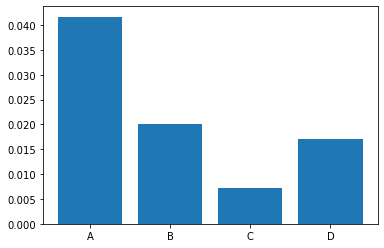

In [70]:
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

# Visualization Question 1

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

plt.bar(range(len(abandonment_rates)), list(abandonment_rates.values()), align='center')
plt.xticks(range(len(abandonment_rates)), list(abandonment_rates.keys()))
plt.show()

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


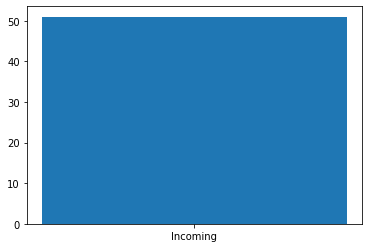

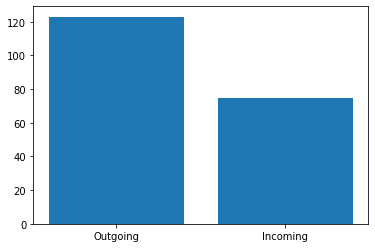

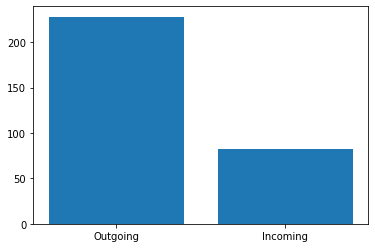

In [80]:
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

# Visualization Question 3

purpose_group = df.groupby("Call Purpose")
call_purposes = ["Complaint", "Product Support", "Sales Support"] 
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

plt.bar(range(len(complaints)), list(complaints.values()), align='center')
plt.xticks(range(len(complaints)), list(complaints.keys()))
plt.show()

plt.bar(range(len(sales_support)), list(sales_support.values()), align='center')
plt.xticks(range(len(sales_support)), list(sales_support.keys()))
plt.show()

plt.bar(range(len(product_support)), list(product_support.values()), align='center')
plt.xticks(range(len(product_support)), list(product_support.keys()))
plt.show()

# Summarize Your Work

Answers for this section are entirely up to the students.  The rationale behind their choices is the focus of this section. Here are some examples of what their answers might look like:

#. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?
    
    The North branch gets fewer calls than the South branch so it makes sense that they have a better service level and speed of answer. This is why I would say the North branch is more efficient.

#. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

    I would add more reps to the South branch because they get more calls and are struggling to keep up with the North branch in terms of efficiency with speed of answer and service level.
    
#. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

    I wish I had a total call time! I think that would be really helpful when thinking about call center efficiency.

## Bonus Mission

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [ ]:
# SYNTAX

# Create smaller table:
# call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:
# total_call_types = call_times.groupby("Time Block").sum().plot.bar()

# Use groupby and get_group to select which call purpose to plot:
# complaint_times = call_times.groupby("Call Purpose").get_group("Complaint").value_counts().plot.bar()
# sales_times = call_times.groupby("Call Purpose").get_group("Sales Support").value_counts().plot.bar()
# product_times = call_times.groupby("Call Purpose").get_group("Product Support").value_counts().plot.bar()